In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style='darkgrid',palette='viridis')

In [2]:
df = pd.read_csv(r"C:\Users\VICTUS\Downloads\MLR (1)\MLR\ToyotaCorolla - MLR.csv")
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [3]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [4]:
df['Cylinders'].value_counts()

Cylinders
4    1436
Name: count, dtype: int64

In [5]:
df['Automatic'].value_counts()

Automatic
0    1356
1      80
Name: count, dtype: int64

In [6]:
df['Fuel_Type'].value_counts()

Fuel_Type
Petrol    1264
Diesel     155
CNG         17
Name: count, dtype: int64

In [7]:
df.duplicated().sum()

1

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.drop(columns=['Cylinders'],inplace=True)

In [10]:
df.dtypes

Price         int64
Age_08_04     int64
KM            int64
Fuel_Type    object
HP            int64
Automatic     int64
cc            int64
Doors         int64
Gears         int64
Weight        int64
dtype: object

In [11]:
df.rename(columns={'Age_08_04':'Age','cc':'CC'},inplace=True)
df.head()

,Price,Age,KM,Fuel_Type,HP,Automatic,CC,Doors,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,5,1170


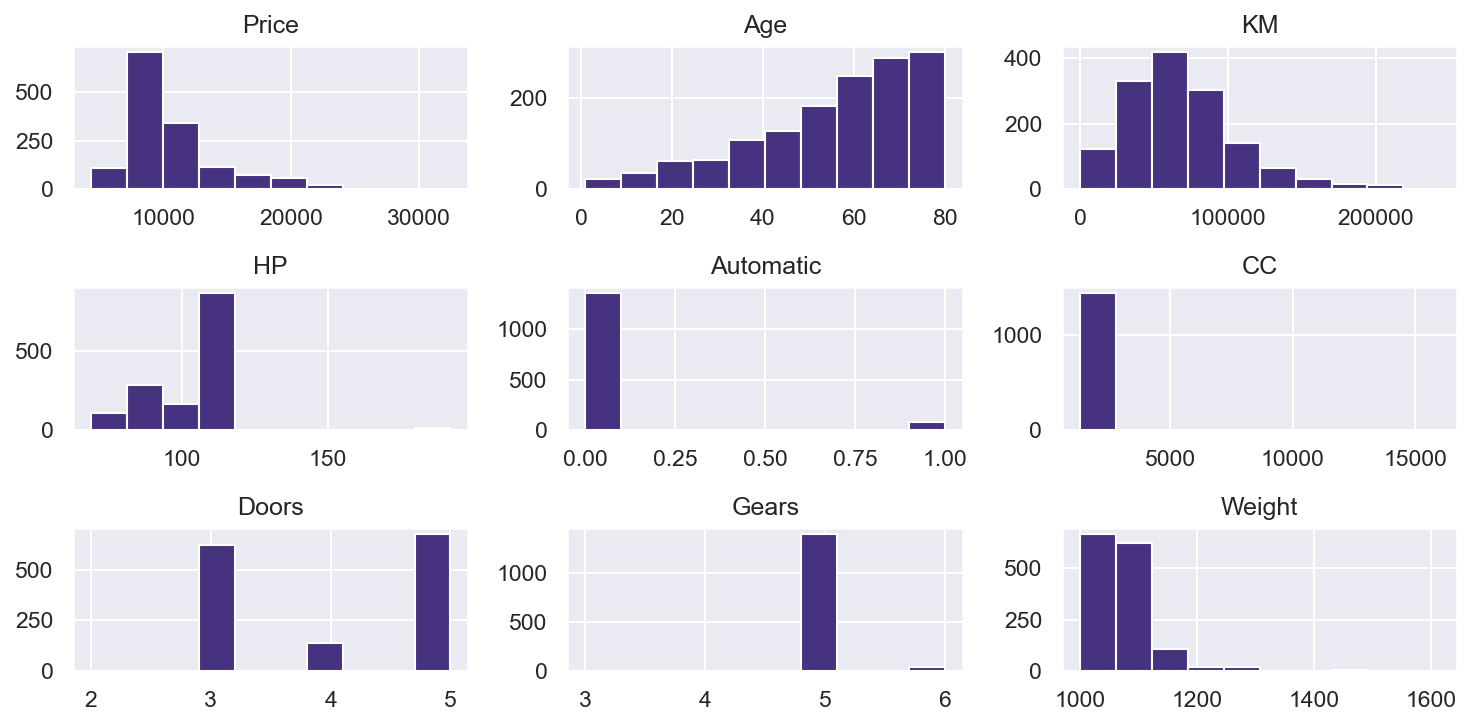

In [12]:
plt.rcParams['figure.figsize'] = 10,5
plt.rcParams['figure.dpi'] = 150
df.hist()
plt.tight_layout()
plt.show()

In [ ]:
sns.pairplot(df)

In [ ]:
df.boxplot()

In [ ]:
# Treating Outliers
def outliers(data,column):
    for col in column:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
       
        IQR = q3-q1
        
        low_ext = q1 - (1.5*IQR)
        upp_ext = q3 + (1.5*IQR)
        
        df[col] = np.where(df[col]>upp_ext,upp_ext,np.where(df[col]<low_ext,low_ext,df[col]))

In [ ]:
outliers(df,df.iloc[:,0:3])

In [ ]:
outliers(df,df.iloc[:,4:10])

In [ ]:
df.boxplot()

In [ ]:
df.corr(numeric_only=True)

In [ ]:
# Converting Data Into Dummy Variables
data = pd.get_dummies(df,dtype=int)

In [ ]:
data

In [ ]:
# Define Data
x = data.iloc[:,1:13]

In [ ]:
x

In [ ]:
y = data['Price']
y

In [ ]:
# Standardized Data
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
S_D = sc.fit_transform(x)

In [ ]:
Final_SD = pd.DataFrame(S_D,columns=x.columns)
Final_SD

In [ ]:
# Spliting The Data 
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=42)

Model Building

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,root_mean_squared_error,r2_score

In [ ]:
# Model 1
LR = LinearRegression()

In [ ]:
LR.fit(x_train,y_train)

In [ ]:
y_pred = LR.predict(x_test)

In [ ]:
mse = mean_squared_error(y_test,y_pred)

In [ ]:
Rmse = root_mean_squared_error(y_test,y_pred)

In [ ]:
r2 = r2_score(y_test,y_pred)

In [ ]:
coefficients = pd.Series(LR.coef_,index=x_train.columns)

In [ ]:
# Evaluation Metrics and Coefficients
print(f'MSE: {mse}')
print(f'RMSE: {Rmse}')
print(f'R2: {r2}')
print(f'Coefficients:')
print(coefficients)

In [ ]:
from sklearn.linear_model import Lasso,Ridge

In [ ]:
# Model 2
Lasso_Model = Lasso(alpha=1.0)

In [ ]:
Lasso_Model.fit(x_train,y_train)

In [ ]:
Lasso_pred = Lasso_Model.predict(x_test)

In [ ]:
Lasso_mse = mean_squared_error(y_test,Lasso_pred)

In [ ]:
Lasso_r2 = r2_score(y_test,Lasso_pred)
Lasso_r2

In [ ]:
# Model 3
ridge_model = Ridge(alpha=1.0)

In [ ]:
ridge_model.fit(x_train,y_train)

In [ ]:
ridge_pred = ridge_model.predict(x_test)

In [ ]:
ridge_mse = mean_squared_error(y_test,ridge_pred)
ridge_mse

In [ ]:
ridge_r2 = r2_score(y_test,ridge_pred)
ridge_r2